In [1]:
!pip install diffusers transformers accelerate --upgrade

  Obtaining dependency information for diffusers from https://files.pythonhosted.org/packages/31/76/7a48265cb735e68bac131c74337cba06103862686151176cc6605cf2075c/diffusers-0.23.1-py3-none-any.whl.metadata
  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/12/dd/f17b11a93a9ca27728e12512d167eb1281c151c4c6881d3ab59eb58f4127/transformers-4.35.2-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 kB 4.8 MB/s eta 0:00:00
  Obtaining dependency information for accelerate from https://files.pythonhosted.org/packages/13/9e/ee987874058f2d93006961f6ff49e0bcb60ab9c26709ebe06bfa8707a4d8/accelerate-0.24.1-py3-none-any.whl.metadata
  Obtaining dependency information for tokenizers<0.19,>=0.14 from https://files.pythonhosted.org/packages/eb/3d/eee5f3c572a3f4db2ebabf5bd4f284f356078a5b5d27e6229b4450d5c5e4/tokenizers-0.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [21]:
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

The config attributes {'feature_extractor': [None, None], 'image_encoder': [None, None]} were passed to StableDiffusionXLPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.
Keyword arguments {'feature_extractor': [None, None], 'image_encoder': [None, None]} are not expected by StableDiffusionXLPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.23.1",
  "_name_or_path": "stabilityai/sdxl-turbo",
  "force_zeros_for_empty_prompt": true,
  "scheduler": [
    "diffusers",
    "EulerAncestralDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/4 [00:00<?, ?it/s]

CPU times: user 475 ms, sys: 23 ms, total: 498 ms
Wall time: 443 ms


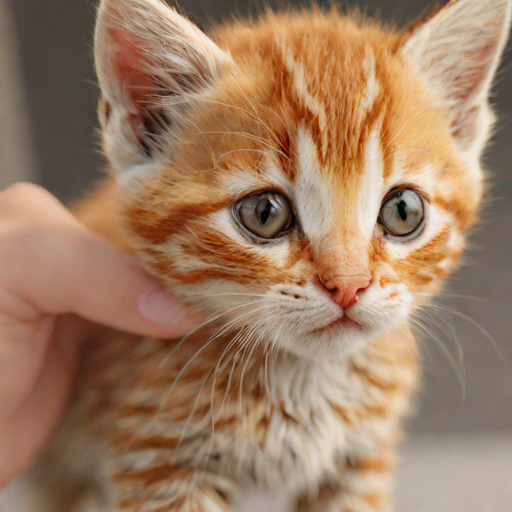

In [263]:
%%time
prompt = """
8k, high quality, detailed face, Lovely Kitten, full body
"""
image = pipe(prompt=prompt, num_inference_steps=4, guidance_scale=0.0).images[0]
image